# Notebook week 5 Quantum Computing Workshop

## Simple example

### Install required packages

In [ ]:
%%writefile requirements.txt

aiohappyeyeballs==2.6.1
aiohttp==3.12.7
aiosignal==1.3.2
annotated-types==0.7.0
asttokens==3.0.0
attrs==25.3.0
cachetools==6.0.0
certifi==2025.4.26
chardet==5.2.0
charset-normalizer==3.4.2
click==8.2.1
colorama==0.4.6
comm==0.2.2
contourpy==1.3.2
cycler==0.12.1
debugpy==1.8.14
decorator==5.2.1
dill==0.4.0
distlib==0.3.9
executing==2.2.0
filelock==3.18.0
fonttools==4.58.1
frozenlist==1.6.0
idna==3.10
ipykernel==6.29.5
ipython==9.3.0
ipython_pygments_lexers==1.1.1
jedi==0.19.2
jupyter_client==8.6.3
jupyter_core==5.8.1
kiwisolver==1.4.8
libqasm==1.2.0
markdown-it-py==3.0.0
matplotlib==3.10.3
matplotlib-inline==0.1.7
mdurl==0.1.2
mpmath==1.3.0
multidict==6.4.4
nest-asyncio==1.6.0
networkx==3.5
numpy==1.26.4
oauthlib==3.2.2
opensquirrel==0.5.0
packaging==25.0
parso==0.8.4
pbr==6.1.1
pillow==11.2.1
platformdirs==4.3.8
pluggy==1.6.0
prompt_toolkit==3.0.51
propcache==0.3.1
psutil==7.0.0
pure_eval==0.2.3
pydantic==2.11.5
pydantic-settings==2.9.1
pydantic_core==2.33.2
Pygments==2.19.1
PyJWT==2.10.1
pylatexenc==2.10
pyparsing==3.2.3
pyproject-api==1.9.1
python-dateutil==2.9.0.post0
python-dotenv==1.1.0
pywin32==310
pyzmq==26.4.0
qi-compute-api-client==0.50.0
qiskit==1.4.3
qiskit-quantuminspire @ git+https://github.com/QuTech-Delft/qiskit-quantuminspire@ad75dbcb54ba7e67970cd26b46f4f401f59f3c47
quantuminspire @ git+https://github.com/QuTech-Delft/quantuminspire@338227905054e5377b8dccc0f952eab4bf07eb7f
requests==2.32.3
rich==14.0.0
rustworkx==0.16.0
scipy==1.15.3
shellingham==1.5.4
six==1.17.0
stack-data==0.6.3
stevedore==5.4.1
symengine==0.13.0
sympy==1.14.0
tornado==6.5.1
tox==4.26.0
traitlets==5.14.3
typer==0.16.0
typing-inspection==0.4.1
typing_extensions==4.14.0
urllib3==2.4.0
virtualenv==20.31.2
wcwidth==0.2.13
yarl==1.20.0


In [1]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
# Alternatively, you can use the following command to install the requirements:
# !pip install git+https://github.com/QuTech-Delft/quantuminspire
# !pip install git+https://github.com/QuTech-Delft/qiskit-quantuminspire
# !pip install matplotlib
# !pip install pylatexenc

### Login to Quantum Inspire

When you run the following cell, you will be prompted to log in to your Quantum Inpsire account. If you do not have an account, you can create one for free at https://quantuminspire.com.

In [2]:
!qi login "https://api.quantum-inspire.com"

Please continue logging in by opening: https://auth.quantum-inspire.com/activate?user_code=BKDB-JHBW in your browser
If promped to verify a code, please confirm it is as follows: BKDB-JHBW
Login successful!
Using member ID 28


### Study the backend

First we check which backends are available to us. The `get_backends` function returns a list of all backends that are available to you. You can use the `get_backend` function to get a specific backend by name.

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_quantuminspire.qi_provider import QIProvider

provider = QIProvider()
provider.backends()

[<qiskit_quantuminspire.qi_backend.QIBackend object at 0x17bb0f48c50 (name=QX emulator, id=1)>,
 <qiskit_quantuminspire.qi_backend.QIBackend object at 0x17bafc6c0d0 (name=Spin-2+, id=2)>,
 <qiskit_quantuminspire.qi_backend.QIBackend object at 0x17bb2f8c1d0 (name=Starmon-7, id=3)>,
 <qiskit_quantuminspire.qi_backend.QIBackend object at 0x17bb1630750 (name=Tuna-5, id=4)>]

In [36]:
backend_simulator = provider.get_backend(name="QX emulator")
backend = provider.get_backend(name="Starmon-7")

Get the description: 

In [8]:
print(backend.description)

The Starmon-7 quantum processor consists of seven superconducting transmon qubits in an X configuration. Each transmon has up to seven ports: up to four bus resonators coupling to nearest neighbors, a microwave-control line for single-qubit gates, a flux-control line for two-qubit gates, and a readout resonator.


Show the status: 

In [9]:
backend.status

<BackendStatus.IDLE: 'idle'>

If it is not `offline` or `calibrating`, we can use it to run our circuits.

Let's draw a map of the architecture of the backend. This will show us how the qubits are connected to each other. 

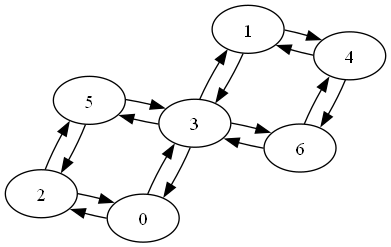

In [10]:
backend.coupling_map.draw()

What type of instructions are supported by the backend? On which qubits can we run these instructions?

In [12]:
backend.instructions

[(Instruction(name='y', num_qubits=1, num_clbits=0, params=[]), (0,)),
 (Instruction(name='y', num_qubits=1, num_clbits=0, params=[]), (1,)),
 (Instruction(name='y', num_qubits=1, num_clbits=0, params=[]), (2,)),
 (Instruction(name='y', num_qubits=1, num_clbits=0, params=[]), (3,)),
 (Instruction(name='y', num_qubits=1, num_clbits=0, params=[]), (4,)),
 (Instruction(name='y', num_qubits=1, num_clbits=0, params=[]), (5,)),
 (Instruction(name='y', num_qubits=1, num_clbits=0, params=[]), (6,)),
 (Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), (0,)),
 (Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), (1,)),
 (Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), (2,)),
 (Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), (3,)),
 (Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), (4,)),
 (Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), (5,)),
 (Instruction(name='measure', num_qubits=

We usually run a circuit multiple times to get a good estimate of the results. This is called the number of shots. The more shots we run, the more accurate our results will be, but it will also take longer to run the circuit. 

In [13]:
backend.max_shots

19192

### Make the circuit

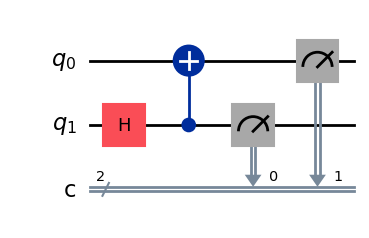

In [33]:
qubit_0 = 1 # 3
qubit_1 = 0 # 6

qc = QuantumCircuit(2, 2)

qc.h(qubit_0)
qc.cx(qubit_0, qubit_1)
qc.measure(qubit_0, cbit=0)
qc.measure(qubit_1, cbit=1)

qc.draw('mpl')

Let's now run a simple circuit on the backend. We will create a circuit with two qubits, apply a Hadamard gate to the first qubit, and then measure both qubits. Notice that the following code only depends on `qiskit`, not on the specific Quantum Inspire backend. 

In [50]:
qubit_0 = 3
qubit_1 = 6

qc = QuantumCircuit(7, 2)

qc.h(qubit_0)
qc.cx(qubit_0, qubit_1)
qc.delay(10000)
qc.measure(qubit_0, cbit=0)
qc.measure(qubit_1, cbit=1)

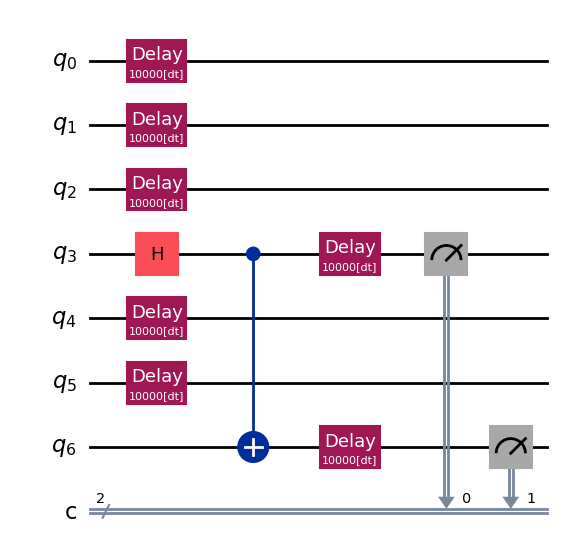

In [51]:
qc.draw('mpl')

### Run the circuit

In [52]:
nr_shots = backend.max_shots
job = backend.run(qc, shots=nr_shots)
result = job.result(timeout = 600)

### Obtain and visualize the results

In [53]:
result

Result(backend_name='Starmon-7', backend_version='1.0.0', qobj_id='', job_id='80156', success=True, results=[ExperimentResult(shots=19192, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 18352, '0x1': 346, '0x2': 481, '0x3': 13}), header=QobjExperimentHeader(name='circuit-166', memory_slots=2), status=Experiment successful)], date=None, status=Result successful, header=None, system_messages={})

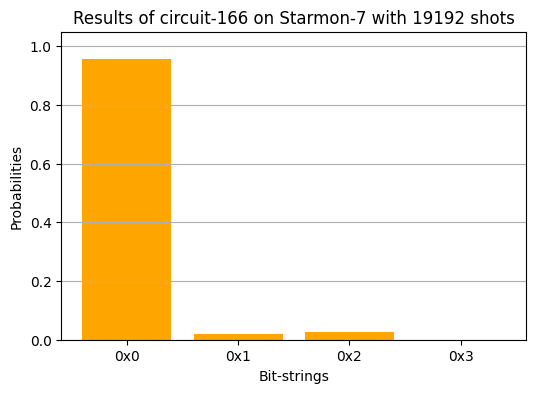

In [54]:
counts = result.results[0].data.counts

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))

for bit_string in counts:
    ax.bar(bit_string, counts[bit_string] / nr_shots, color='orange')

ax.set_xlabel("Bit-strings")
ax.set_ylabel("Probabilities")
ax.set_title(f"Results of {qc.name} on {backend.name} with {nr_shots} shots")

ax.set_ylim(0.0, 1.05)

plt.grid(axis='y')
plt.show()

## Transpilation

In order to run the above circuit, we will need to transpile it.


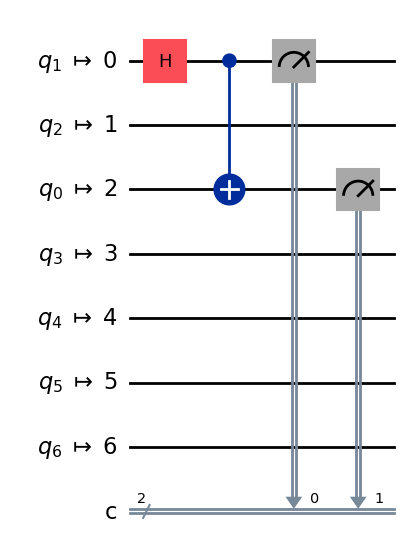

In [ ]:
qc_transpiled = transpile(qc, backend)
# we could also set the
# - initial_layout
# - optimization_level
# - coupling_map

qc_transpiled.draw('mpl')

Study the result

In [ ]:
qc = qc_transpiled

## The BBM92 protocol

In [ ]:
import random
num_rounds = 5


=== BBM92 - 5 rounds in one circuit ===
Alice bases: ['X', 'Z', 'Z', 'X', 'X']
Bob bases:   ['Z', 'Z', 'Z', 'Z', 'Z']
Alice raw:   [0, 1, 0, 0, 1]
Bob raw:     [1, 1, 0, 0, 1]
Sifted key (Alice): [1, 0]
Sifted key (Bob):   [1, 0]
QBER: 0.00%


Randomly choose measurement bases for each round

In [ ]:
alice_bases = [random.choice(['Z', 'X']) for _ in range(num_rounds)]
bob_bases   = [random.choice(['Z', 'X']) for _ in range(num_rounds)]

We need $2$ times the number of rounds as qubits. Let's create a circuit with 10 qubits (5 pairs) and 10 classical bits

In [38]:
qc = QuantumCircuit(2 * num_rounds, 2 * num_rounds)

We construct the cicuit as follows:

In [ ]:
for i in range(num_rounds):
    a_qubit = 2 * i     # Alice's qubit
    b_qubit = 2 * i + 1 # Bob's qubit

    # Step 1: Prepare Bell state |Φ⁺⟩ = (|00⟩ + |11⟩)/√2
    qc.h(a_qubit)
    qc.cx(a_qubit, b_qubit)

    # Step 2a: Apply basis for Alice
    if alice_bases[i] == 'X':
        qc.h(a_qubit)
    
    # Step 2b: Apply basis for Bob
    if bob_bases[i] == 'X':
        qc.h(b_qubit)

    # Step 3: Measure!
    qc.measure(a_qubit, a_qubit)
    qc.measure(b_qubit, b_qubit)

Now we run the circuit. 

In [ ]:
job = backend_simulator.run(qc, shots=1, memory=True)
bits = job.result().get_memory()[0]  # Bitstring like '0100110101'
bits = bits[::-1]  # Reverse bit order (Qiskit qubit 0 is rightmost)
alice_raw = [int(bits[2*i]) for i in range(num_rounds)]
bob_raw   = [int(bits[2*i+1]) for i in range(num_rounds)]

Some post-processing, sifting the keys. 

In [ ]:
sifted_alice = []
sifted_bob = []
for i in range(num_rounds):
    if alice_bases[i] == bob_bases[i]:
        sifted_alice.append(alice_raw[i])
        sifted_bob.append(bob_raw[i])


We estimate QBER (qubit error rate) from all matched bits.

In [ ]:
errors = sum(1 for a, b in zip(sifted_alice, sifted_bob) if a != b)
qber = errors / len(sifted_alice) if sifted_alice else 0


We display the results. 

In [ ]:
print("=== BBM92 - 5 rounds in one circuit ===")
print("Alice bases:", alice_bases)
print("Bob bases:  ", bob_bases)
print("Alice raw:  ", alice_raw)
print("Bob raw:    ", bob_raw)
print("Sifted key (Alice):", sifted_alice)
print("Sifted key (Bob):  ", sifted_bob)
print(f"QBER: {qber:.2%}")


Some privacy amplification?

## The BB84 Protocol


For the BB84 protocol, we will use the simulator backend, so that we can use more qubits. 

In [ ]:
n = 10

### Step 1: Alice prepares random bits and bases

In [ ]:
from random import random
rand_bit = lambda: 1 if random() > .5 else 0
rand_bits = lambda n: [rand_bit() for _ in range(n)]

alice_bits = rand_bits(n)
alice_bases = rand_bits(n)

### Step 2: Alice encodes qubits

In [ ]:
alice_qubits = []
for bit, basis in zip(alice_bits, alice_bases):
    qc = QuantumCircuit(1, 1)
    if bit == 1:
        qc.x(0)
    if basis == 1:
        qc.h(0)
    alice_qubits.append(qc)

### Step 3: Bob chooses random bases and measures

In [ ]:
...

### Step 4: Alice and Bob publicly compare bases

In [ ]:
...

### Step 5: Sift key

In [ ]:
...

### Step 6: Eavesdropping check

In [ ]:
...

### Step 7: Privacy amplification

In [ ]:
...

## The E91 protocol

In [ ]:
...